# **MNIST Handwritten Digit Classification using Neural Network**

### **Importing Dependencies**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix

In [ ]:
tf.random.set_seed(3)
from keras.datasets import mnist

### **Loading Training and Testing Dataset**

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data(path="mnist.npz")

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of Y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of Y_test:  (10000,)


*   **Training Dataset**: It contains 60,000 images
*   **Testing Dataset**: It contains 10,000 images
*   **Image dimensions**: 28 x 28
*   **Grayscale**: True

### **Analyzing Training Dateset Image**

In [ ]:
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [ ]:
print(X_train[1].shape)

(28, 28)


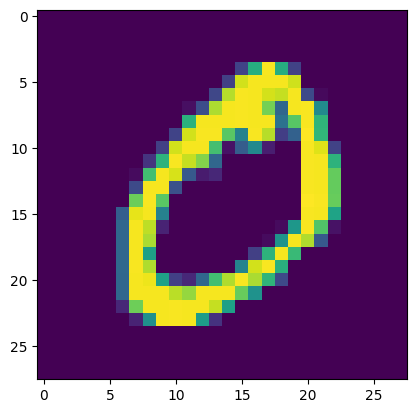

In [ ]:
plt.imshow(X_train[1])
plt.show()

In [ ]:
print(Y_train[1])

0


### **Image labels**

In [ ]:
print(f"Uniques in Y_train: {np.unique(Y_train)}")
print(f"Uniques in Y_test : {np.unique(Y_test)}")

Uniques in Y_train: [0 1 2 3 4 5 6 7 8 9]
Uniques in Y_test : [0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
print(X_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### **Building the Neural Network**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8556 - loss: 0.5070
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9562 - loss: 0.1454
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9678 - loss: 0.1049
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9755 - loss: 0.0835
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9801 - loss: 0.0679
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0564
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0480
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9873 - loss: 0.0416
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9894 - loss: 0.0349
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0316


### **Model Evaluation on Testing Dataset**

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9663 - loss: 0.1334


In [ ]:
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy:.2%}")

Test Loss: 0.12600825726985931
Test Accuracy: 96.86%


In [ ]:
print(X_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

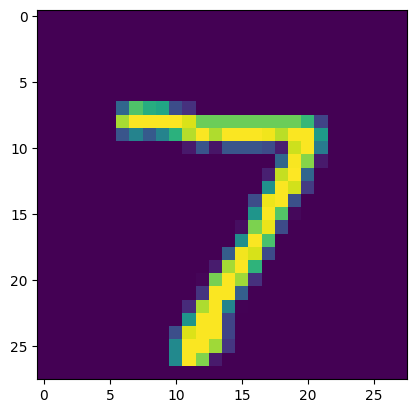

In [ ]:
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)


In [ ]:
print(Y_pred[0])

[4.5544271e-12 5.7786625e-10 4.8187083e-08 1.1614430e-03 2.0287634e-11
 8.2194662e-10 8.2547550e-17 9.9829650e-01 3.7080719e-07 5.4153794e-04]


In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(np.asarray(Y_pred_labels))

[7 2 1 ... 4 5 6]


In [ ]:
print(Y_pred_labels[0])

7


### **Confusion Matrix**

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 959    0    2    4    0    2    3    4    1    5]
 [   0 1101    3    4    2    0    5    2   18    0]
 [   5    0  994   13    5    0    3    5    7    0]
 [   0    0    3  988    1    3    0    6    3    6]
 [   1    1    0    1  949    2   11    2    2   13]
 [   3    0    0   21    1  853    4    1    6    3]
 [   3    2    0    2    1    4  945    1    0    0]
 [   0    2    7    7    0    0    0  999    0   13]
 [   4    0    4   19    5    8    4    4  922    4]
 [   0    1    1    6   13    1    2    5    4  976]], shape=(10, 10), dtype=int32)


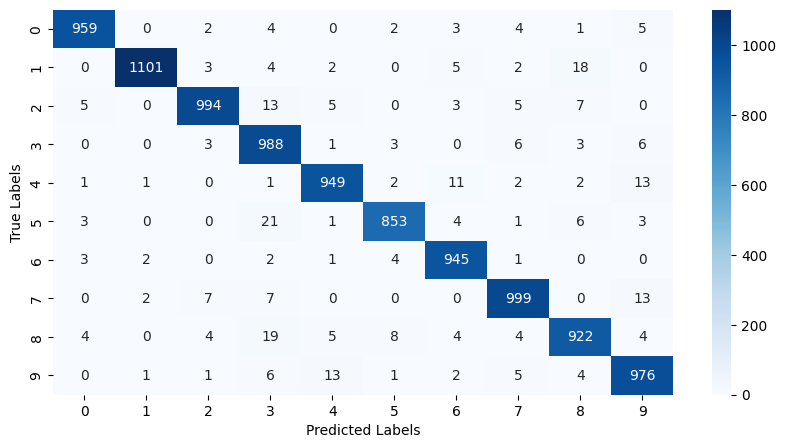

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### **Testing a single input image**

In [ ]:
input_img_path = "/content/mnist_image.png"
input_img = cv2.imread(input_img_path)
type(input_img)

numpy.ndarray

In [ ]:
print(input_img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


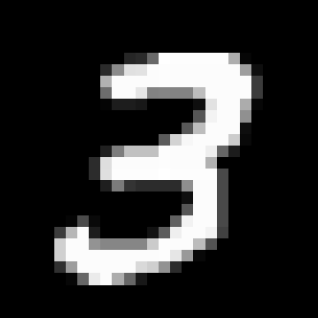

In [ ]:
cv2_imshow(input_img)

In [ ]:
input_img.shape

(318, 318, 3)

In [ ]:
grayscale = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
print(grayscale.shape)

(318, 318)


In [ ]:
input_img_resized = cv2.resize(grayscale, (28, 28))
print(input_img_resized.shape)

(28, 28)


In [ ]:
cv2_imshow(input_img_resized)

In [ ]:
input_img_resized = input_img_resized / 255

In [ ]:
input_img = np.reshape(input_img_resized, (1, 28, 28))
print(input_img.shape)

(1, 28, 28)


In [ ]:
prediction = model.predict(input_img)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[2.2223478e-24 1.5503833e-17 2.4689943e-18 1.0000000e+00 2.4912982e-22
  3.6700917e-15 1.2644782e-33 1.5020091e-14 1.4291427e-15 4.5962444e-12]]


In [ ]:
pred_label = np.argmax(prediction)
print(pred_label)

3


### **Making a Predictive System**

In [ ]:
def predict_digit(img_path):
    # Load/Read image using cv2 library:
    input_img = cv2.imread(img_path)

    # Convert image into grayscale:
    grayscale = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Resize the image to specific dimensions and scale down the numeric values:
    input_img_resized = cv2.resize(grayscale, (28, 28))
    input_img_resized = input_img_resized / 255

    # Reshape the input image array:
    input_img = np.reshape(input_img_resized, (1, 28, 28))

    # Model prediction:
    prediction = model.predict(input_img)
    pred_label = np.argmax(prediction)

    # Display the predicted digit:
    print(pred_label)

In [ ]:
predict_digit("/content/0.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
0


In [ ]:
predict_digit("/content/1.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1


In [ ]:
predict_digit("/content/2.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2


In [ ]:
predict_digit("/content/3.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3


In [ ]:
predict_digit("/content/4.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4


In [ ]:
predict_digit("/content/5.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
9


In [ ]:
predict_digit("/content/6.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6


In [ ]:
predict_digit("/content/7.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
7


In [ ]:
predict_digit("/content/8.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
9


In [ ]:
predict_digit("/content/9.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
9
